In [5]:
import csv

import matplotlib.pyplot as plt

import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import abline_plot

import numpy as np

In [6]:
fin = open('data/our_data.csv', 'r')
our = csv.DictReader(fin)
our_data = [row for row in our]

our_title = 'title'
our_platform = 'platform'
our_score = 'score'
our_release_y = 'release_year'
our_release_m = 'release_month'
our_release_d = 'release_day'

our_rank = 'Rank'
our_genre = 'Genre'
our_publisher = 'Publisher'
our_NA = 'NA_Sales'
our_EU = 'EU_Sales'
our_JP = 'JP_Sales'
our_other = 'Other_Sales'
our_global = 'Global_Sales'

our_keys = [our_title, our_platform, our_score, our_release_y, our_release_m, our_release_d, our_rank, our_genre, \
            our_publisher, our_NA, our_EU, our_JP, our_other, our_global]

## Plots showing specific keys over time

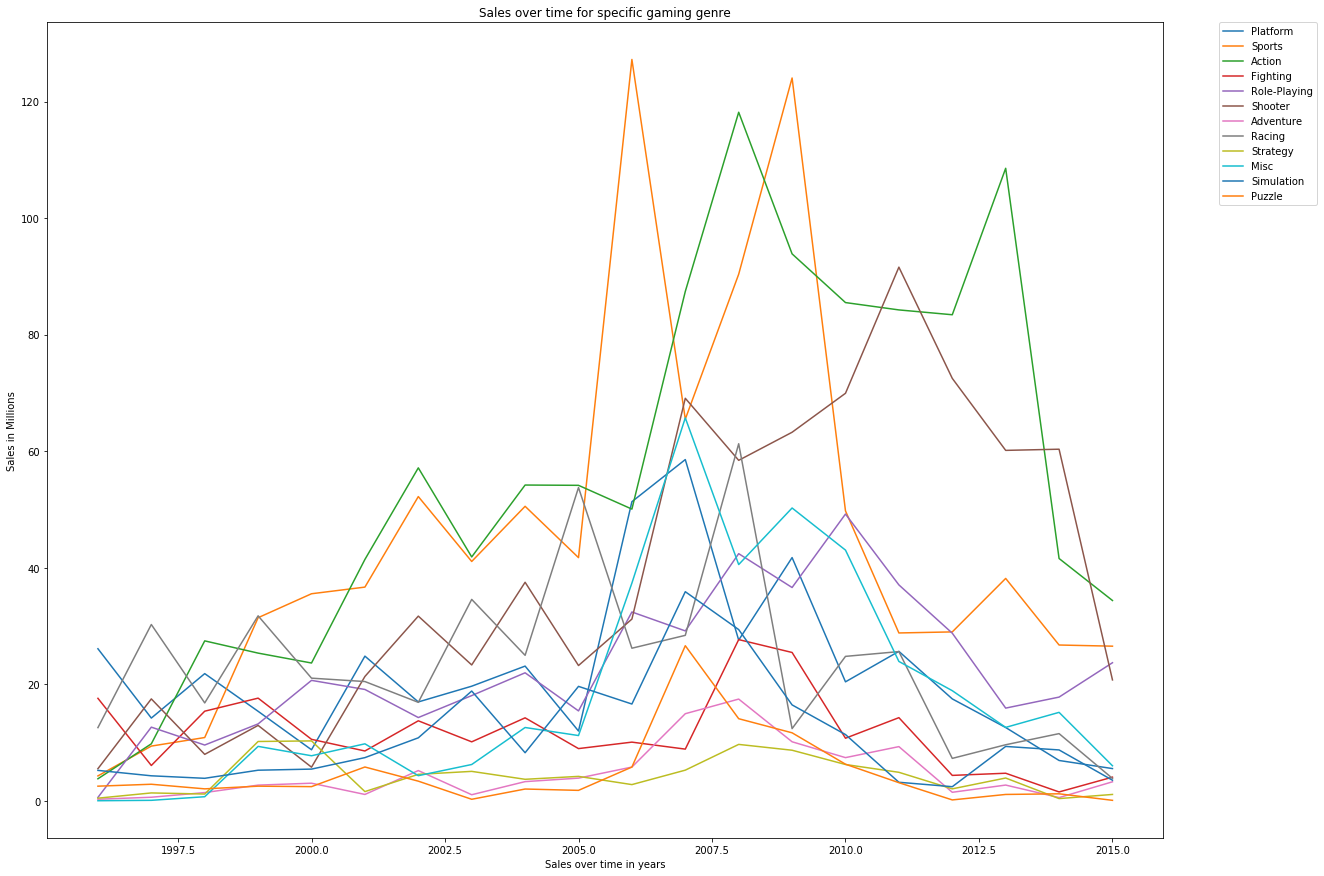

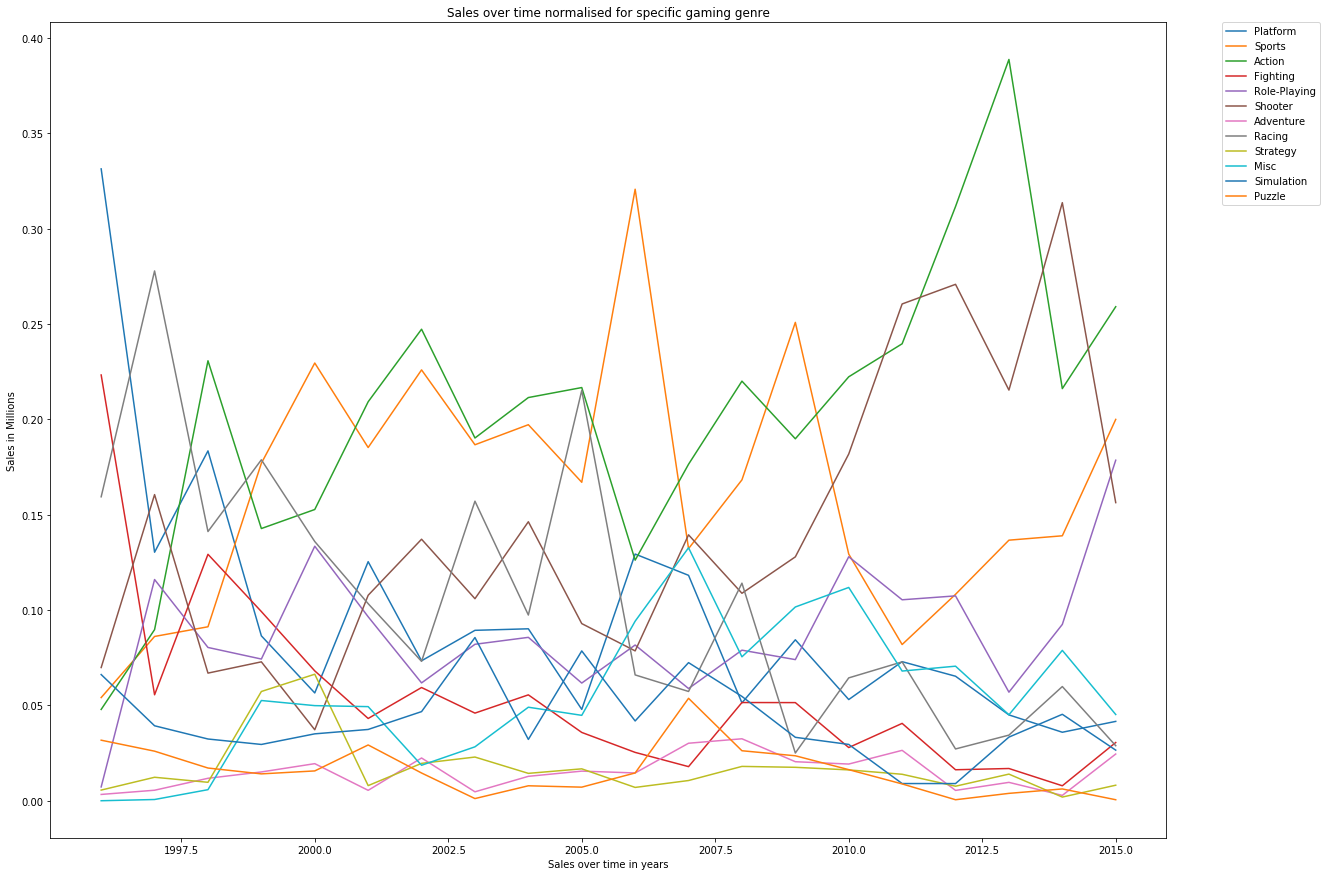

In [7]:
def get_key_values(data, key):
    values = []
    
    for row in data:
        if row[key] not in values:
            values += [row[key]]
            
    return values

def count_sales_key_year(data, key, value):
    years = get_key_values(data, our_release_y)
    years = [int(x) for x in years]
    years = sorted(years, key=int)
    years = [year for year in years if year < 2016]

    sales = [(sum([float(row[our_global]) for row in data if int(row[our_release_y]) == year and row[key] == value]), year) for year in years]
    
    return sales

def count_sales_key_year_norm(data, key, value):
    years = get_key_values(data, our_release_y)
    years = [int(x) for x in years]
    years = sorted(years, key=int)
    years = [year for year in years if year < 2016]

    
    sales = [(sum([float(row[our_global]) for row in data if int(row[our_release_y]) == year and row[key] == value]) /
              sum([float(row[our_global]) for row in data if int(row[our_release_y]) == year]), year) for year in years]
    
    return sales

def plot_sales_time_key(data, key, title):
    values = get_key_values(data, key)
    
    stgs = [count_sales_key_year(data, key, value) for value in values]
    plt.figure(figsize=(20,15))

    for i in range(0, len(stgs)):
        axis_x = [x[1] for x in stgs[i]]
        axis_y = [x[0] for x in stgs[i]]
        
        plt.plot(axis_x, axis_y, label=values[i])
    
    plt.xlabel('Sales over time in years')
    plt.ylabel('Sales in Millions')
    plt.title('Sales over time for specific ' + title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

    stgs = [count_sales_key_year_norm(data, key, value) for value in values]
    plt.figure(figsize=(20,15))

    for i in range(0, len(stgs)):
        axis_x = [x[1] for x in stgs[i]]
        axis_y = [x[0] for x in stgs[i]]
        
        plt.plot(axis_x, axis_y, label=values[i])
    
    plt.xlabel('Sales over time in years')
    plt.ylabel('Sales in Millions')
    plt.title('Sales over time normalised for specific ' + title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()
    
plot_sales_time_key(our_data, our_genre, 'gaming genre')

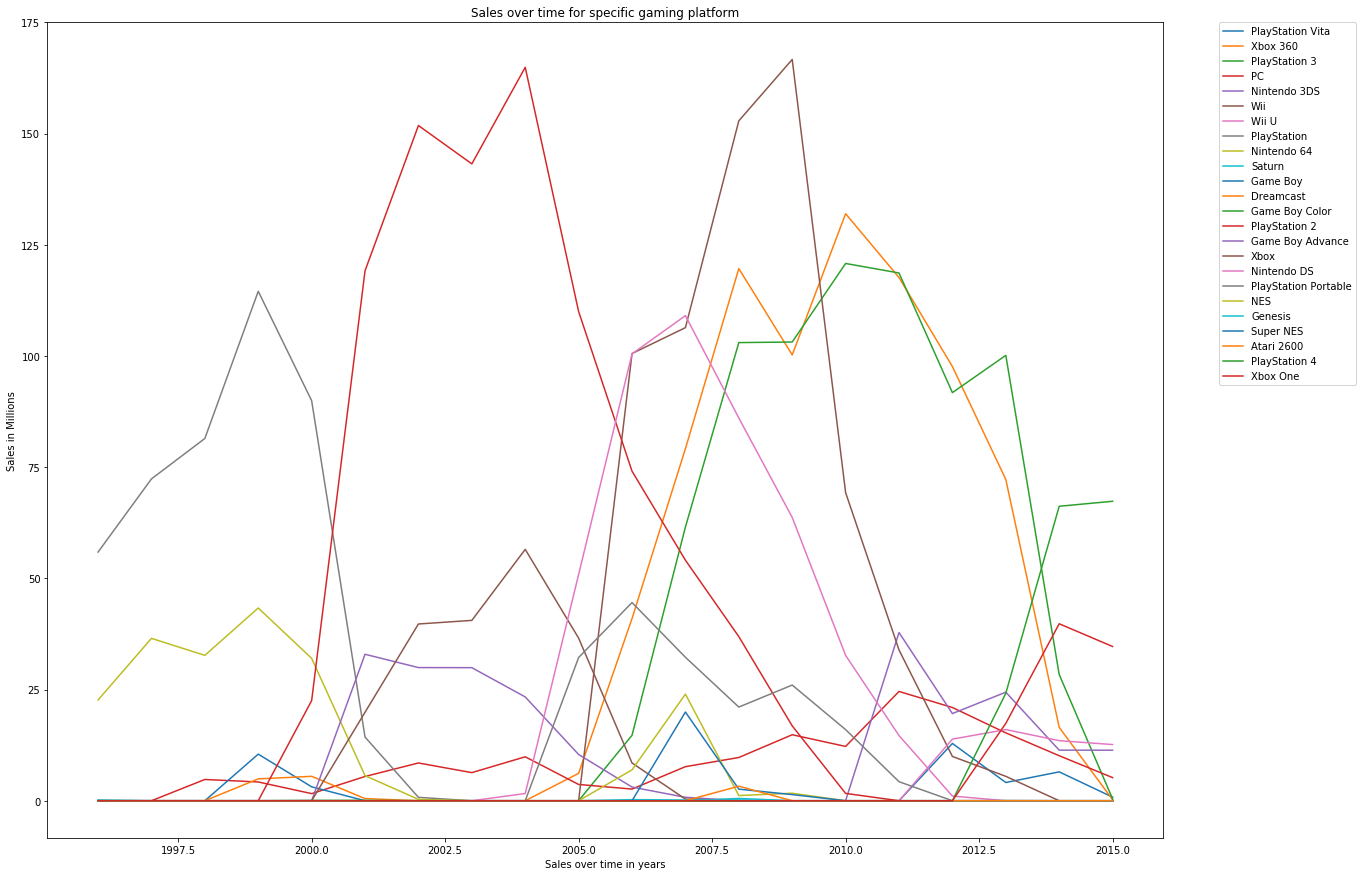

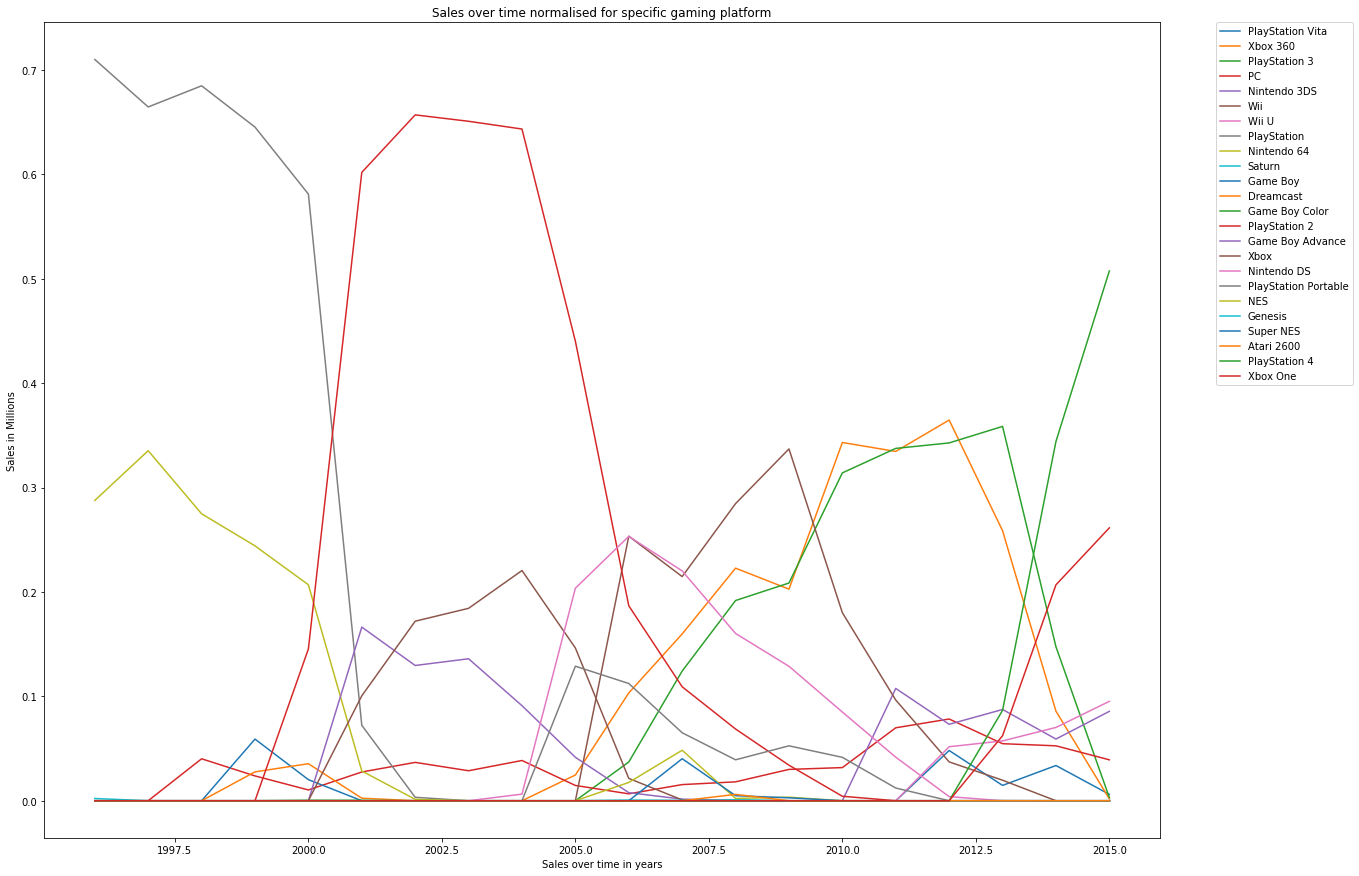

In [4]:
plot_sales_time_key(our_data, our_platform, 'gaming platform')

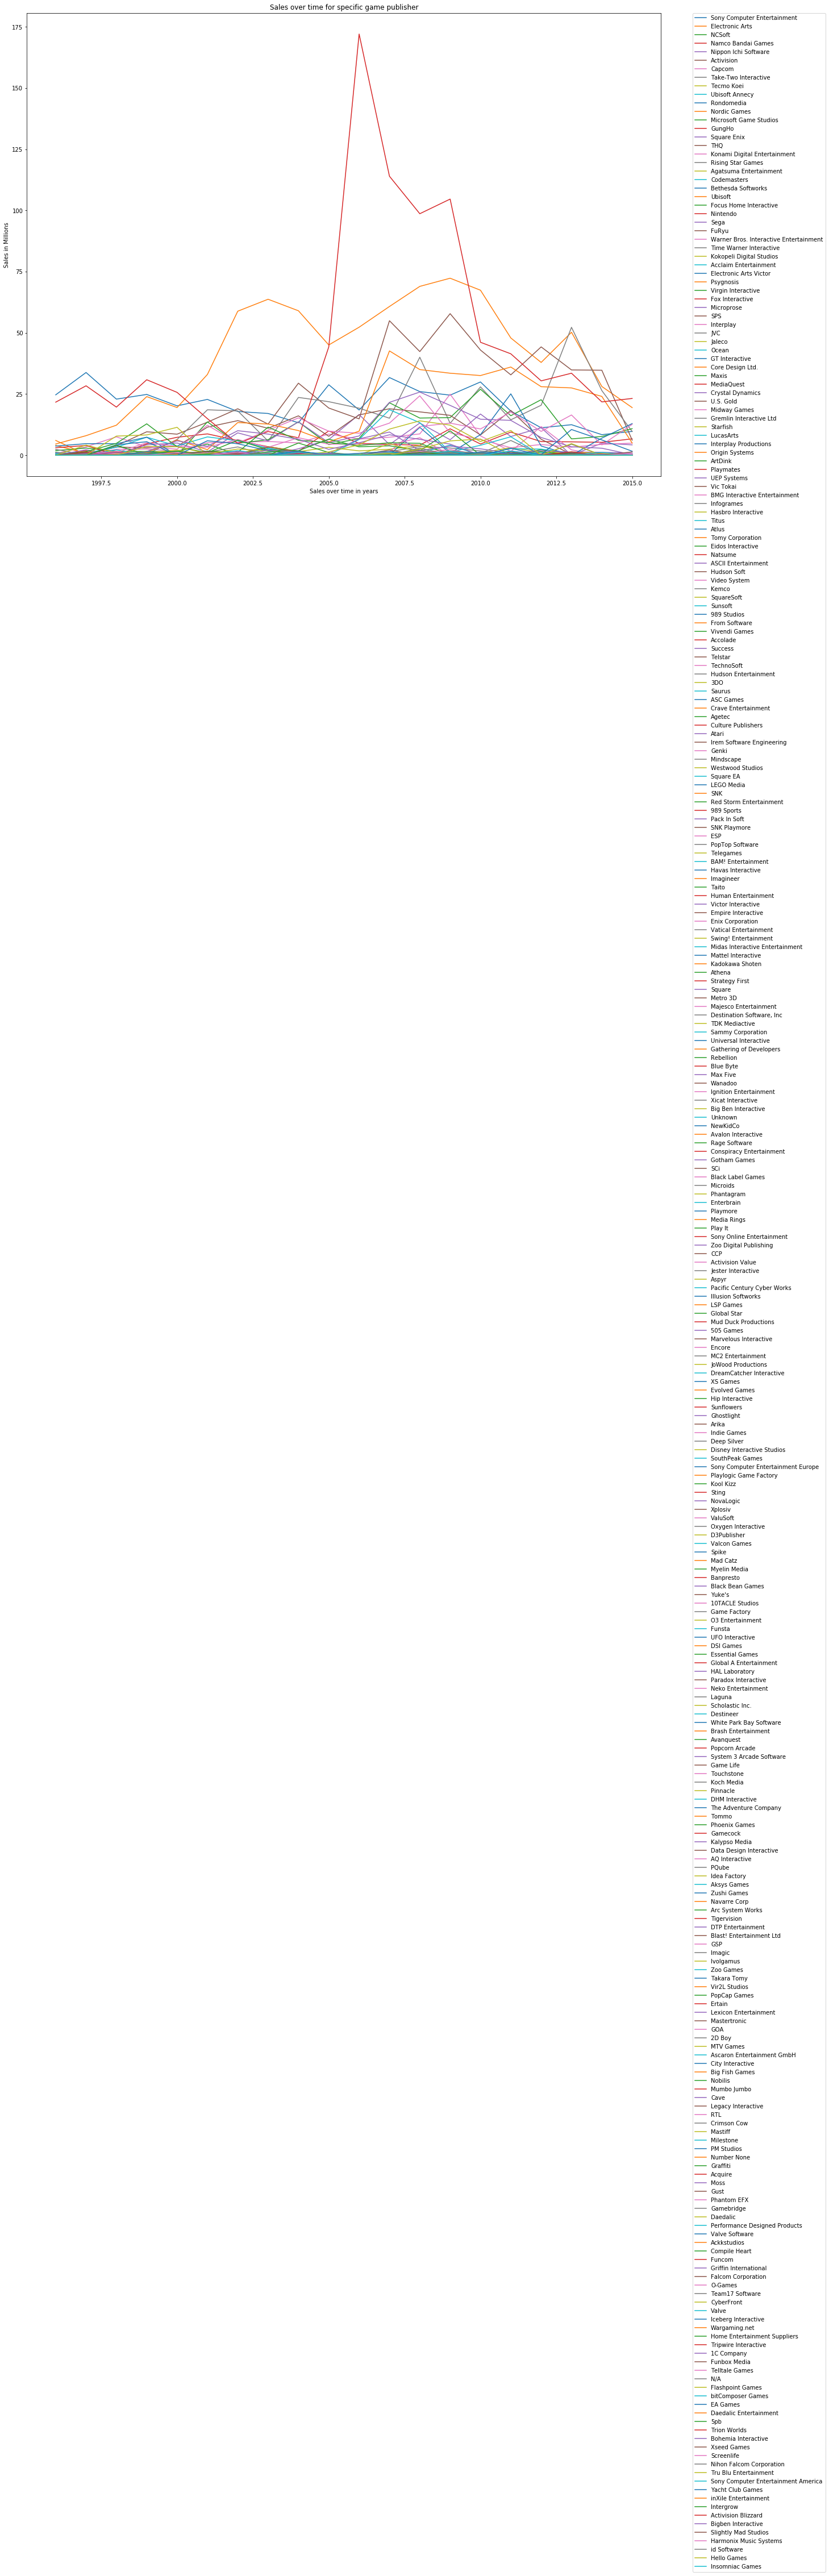

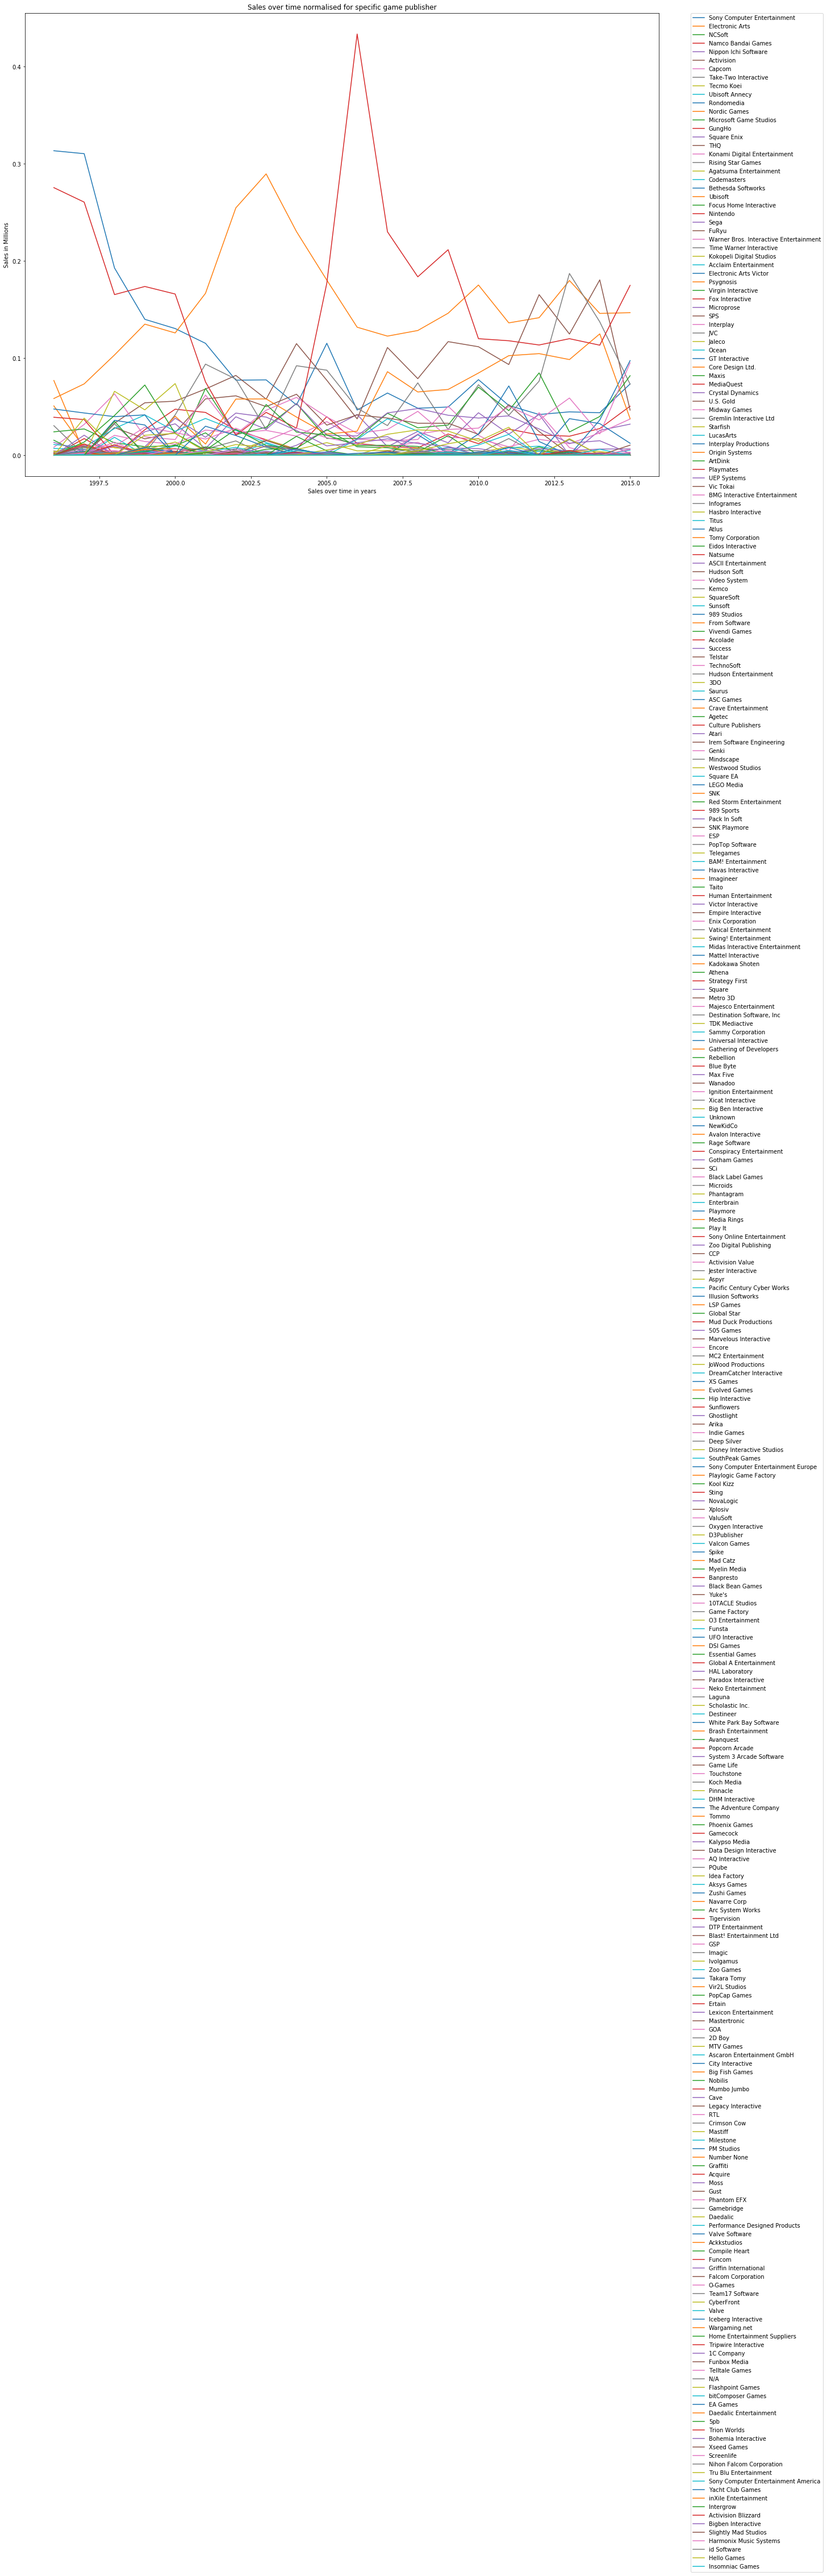

In [5]:
plot_sales_time_key(our_data, our_publisher, 'game publisher')

In [8]:
our_title = 'title'
our_platform = 'platform'
our_score = 'score'
our_release_y = 'release_year'
our_release_m = 'release_month'
our_release_d = 'release_day'

our_rank = 'Rank'
our_genre = 'Genre'
our_publisher = 'Publisher'
our_NA = 'NA_Sales'
our_EU = 'EU_Sales'
our_JP = 'JP_Sales'
our_other = 'Other_Sales'
our_global = 'Global_Sales'

our_keys = [our_title, our_platform, our_score, our_release_y, our_release_m, our_release_d, our_rank, our_genre, \
            our_publisher, our_NA, our_EU, our_JP, our_other, our_global]

In [59]:
def get_target(data, key_name):
    return [row[key_name] for row in data]

def beautify_dict(data):
    for i in range(0, len(data)):
        data[i][our_score] = float(data[i][our_score])
        data[i][our_rank] = int(data[i][our_rank])
        data[i][our_NA] = float(data[i][our_NA])
        data[i][our_EU] = float(data[i][our_EU])
        data[i][our_JP] = float(data[i][our_JP])
        data[i][our_other] = float(data[i][our_other])
        data[i][our_global] = float(data[i][our_global])   

In [9]:
# fin = open('data/our_data_PlayStation.csv', 'r')
# our = csv.DictReader(fin)
# our_data_Playstation = [row for row in our]
# beautify_dict(our_data_Playstation)

# fin = open('data/our_data_PlayStation.csv', 'r')
# our = csv.DictReader(fin)
# our_data_Playstation = [row for row in our]
# beautify_dict(our_data_Playstation)


key_title = 'title'
key_platform = 'platform'
key_score = 'score'
key_release_y = 'release_year'
key_release_m = 'release_month'
key_release_d = 'release_day'
key_release_q = 'release_quarter'

key_rank = 'Rank'
key_genre = 'Genre'
key_publisher = 'Publisher'
key_NA = 'NA_Sales'
key_EU = 'EU_Sales'
key_JP = 'JP_Sales'
key_other = 'Other_Sales'
key_global = 'Global_Sales'

keys = [key_title, key_platform, key_score, key_release_y, key_release_m, key_release_d, key_release_q,\
        key_rank, key_genre, key_publisher, key_NA, key_EU, key_JP, key_other, key_global]

def beautify_dict(data):
    for i in range(0, len(data)):
        data[i][key_score] = float(data[i][key_score])
        data[i][key_rank] = int(data[i][key_rank])
        data[i][key_release_y] = int(data[i][key_release_y])
        data[i][key_release_m] = int(data[i][key_release_m])
        data[i][key_release_d] = int(data[i][key_release_d])
        data[i][key_release_q] = ['Q1', 'Q2', 'Q3', 'Q4'][(data[i][key_release_m] - 1) // 3]
        data[i][key_NA] = float(data[i][key_NA])
        data[i][key_EU] = float(data[i][key_EU])
        data[i][key_JP] = float(data[i][key_JP])
        data[i][key_other] = float(data[i][key_other])
        data[i][key_global] = float(data[i][key_global])

def get_beautiful_dict(file_name):    
    fin = open(file_name, 'r')
    file_data = csv.DictReader(fin)

    data = [row for row in file_data]      
    beautify_dict(data)
    return data

data = get_beautiful_dict('data/our_data.csv')
data_xbox = get_beautiful_dict('data/our_data_Xbox.csv')
data_playstation = get_beautiful_dict('data/our_data_PlayStation.csv')
data_nintendo = get_beautiful_dict('data/our_data_Nintendo.csv')
data_pc = get_beautiful_dict('data/our_data_PC.csv')

### Show lineair regression model for sales using the score

const    8.338058
score    0.388656
dtype: float64


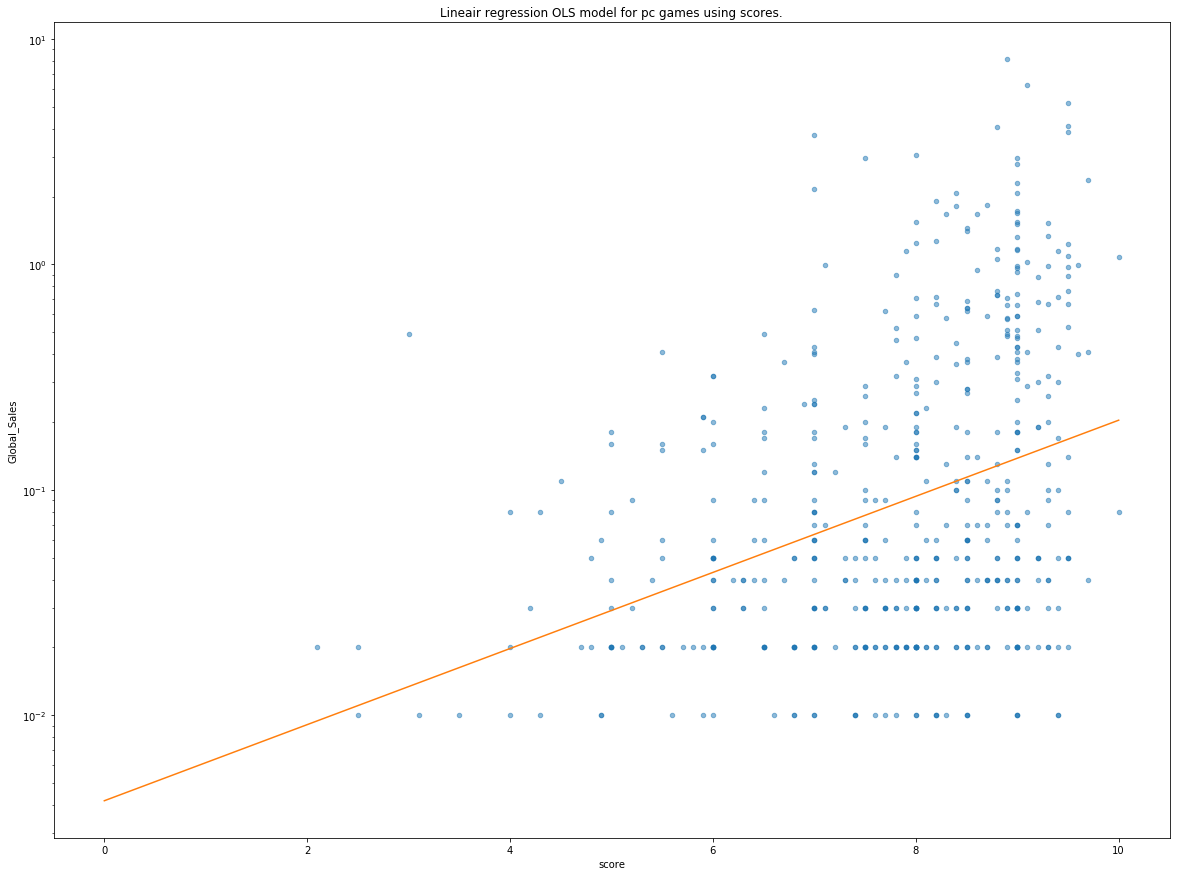

In [234]:
def copy_data(data):
    return [dict(row) for row in data]

def plot_linr(data, target_key, param_key):
    data = copy_data(data)
    data2 = copy_data(data)
    
    for i in range(0, len(data)):
        data2[i][our_global] = np.log(data2[i][our_global] * 10**6)
    
    target_values = get_target(data2, target_key)
    
    df1 = pd.DataFrame(data, columns=our_keys)
    df2 = pd.DataFrame(data2, columns=our_keys)
    
    # Put the target (Global Sales -- Global_Sales) in another DataFrame
    target2 = pd.DataFrame(target_values, columns=[target_key])
    
    X2 = df1[param_key]
    y2 = target2[target_key]
    X2 = sm.add_constant(X2)
    model2 = sm.OLS(y2, X2)

    ax = df1.plot(x=our_score, y=our_global, kind='scatter', alpha=0.5, figsize=(20,15))
    mp = model2.fit().params

    # generate x-values for your regression line (two is sufficient)
    x = np.arange(0, 10.1, 0.1)

    print(mp)
    # plot regression line on the same axes, set x-axis limits

    ax.plot(x, np.e**(mp.const + mp.score * x) / 10**6, color='C1', label='Lin Regression for only param Score')
    plt.yscale('log')
    plt.title('Lineair regression OLS model for pc games using scores.')
    plt.show()
    
data_pc = get_beautiful_dict('data/our_data_PC.csv')
plot_linr(data_pc, our_global, our_score)


#### Determine next Lineair regression models per genre for PlayStation

In [240]:
def calc_LinR_model(data, target_key, param_key):    
    target_values = get_target(data, target_key)
    target_values = [np.log(value) for value in target_values]
    df = pd.DataFrame(data, columns=our_keys)
    
    # Put the target (Global Sales -- Global_Sales) in another DataFrame
    target = pd.DataFrame(target_values, columns=[target_key])
    
    X = df[param_key]
    y = target[target_key]

    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    
    return model

def calc_genre_lin_models(data):
    genres = get_key_values(data, key_genre)
    genres_data = {}
    
    for genre in genres:
        genres_data[genre] = []
        
    for row in data:
        genres_data[row[key_genre]] += [row]

    models = {}
    
    for key in genres_data.keys():
        models[key] = calc_LinR_model(genres_data[key], key_global, key_score)
    
    for key in models.keys():
        print('\n' + key)
        print(models[key].fit().params)
        
    return models

models = calc_genre_lin_models(data_playstation)


Platform
const   -2.91037
score    0.28306
dtype: float64

Sports
const   -3.535590
score    0.370846
dtype: float64

Fighting
const   -3.642258
score    0.380821
dtype: float64

Action
const   -3.296459
score    0.355831
dtype: float64

Role-Playing
const   -4.172949
score    0.418563
dtype: float64

Shooter
const   -3.129035
score    0.325487
dtype: float64

Strategy
const   -2.663824
score    0.123287
dtype: float64

Racing
const   -3.359258
score    0.332626
dtype: float64

Simulation
const   -3.050659
score    0.278666
dtype: float64

Adventure
const   -2.838097
score    0.178525
dtype: float64

Puzzle
const   -3.467152
score    0.199933
dtype: float64

Misc
const   -2.840901
score    0.232860
dtype: float64


In [258]:
def find_best_lin_reg_genre(models):    
    lin_sales_genres = {}
    
    for key in models.keys():
        p = models[key].fit().params
        lin_sales_genres[key] = p.const + 10 * p.score
        
    s = [(k, lin_sales_genres[k]) for k in sorted(lin_sales_genres, key=lin_sales_genres.get, reverse=True)]

    print(s)
    
print('Using all the playstation data data:')
find_best_lin_reg_genre(models)

Using all the playstation data data:
[('Action', 0.26185335546370325), ('Sports', 0.17287381811260882), ('Fighting', 0.16595217082839087), ('Shooter', 0.12583826305580503), ('Role-Playing', 0.012681053451451874), ('Racing', -0.032999712652594493), ('Platform', -0.079767179873465377), ('Simulation', -0.26400330680699202), ('Misc', -0.51230582677548364), ('Adventure', -1.0528440362837324), ('Strategy', -1.4309575786458775), ('Puzzle', -1.4678233126223716)]


### Lineair regression using scores and genres

In [18]:
fin = open('data/big_hits_Xbox.csv', 'r')
big_hits_xbox = fin.readlines() 

fin = open('data/big_hits_PlayStation.csv', 'r')
big_hits_playstation = fin.readlines() 

fin = open('data/big_hits_Nintendo.csv', 'r')
big_hits_nintendo = fin.readlines() 

fin = open('data/big_hits_PC.csv', 'r')
big_hits_pc = fin.readlines() 

fin = open('data/big_hit_per_year_Xbox.csv', 'r')
big_hit_per_year_xbox = fin.readlines() 

fin = open('data/big_hit_per_year_PlayStation.csv', 'r')
big_hit_per_year_playstation = fin.readlines() 

fin = open('data/big_hit_per_year_Nintendo.csv', 'r')
big_hit_per_year_nintendo = fin.readlines() 

fin = open('data/big_hit_per_year_PC.csv', 'r')
big_hit_per_year_pc = fin.readlines() 

In [19]:
def calc_LinR_model_Cat(data): 
    df1 = pd.DataFrame(data[0], columns=our_keys)
    df2 = pd.DataFrame(data[1], columns=our_keys)
    df3 = pd.DataFrame(data[2], columns=our_keys)
    df4 = pd.DataFrame(data[3], columns=our_keys)
    # Put the target (Global Sales -- Global_Sales) in another DataFrame

    fit1 = smf.ols(formula=key_global + ' ~ ' + key_score + ' + ' + 'C(' + key_genre + ')', data=df1).fit()
    fit2 = smf.ols(formula=key_global + ' ~ ' + key_score + ' + ' + 'C(' + key_genre + ')', data=df2).fit()
    fit3 = smf.ols(formula=key_global + ' ~ ' + key_score + ' + ' + 'C(' + key_genre + ')', data=df3).fit()
    fit4 = smf.ols(formula=key_global + ' ~ ' + key_score + ' + ' + 'C(' + key_genre + ')', data=df4).fit()
    
#     print("Q1")
#     print(fit1.summary())
#     print("Q2")
#     print(fit2.summary())
#     print("Q3")
#     print(fit3.summary())
#     print("Q4")
#     print(fit4.params.nlargest(1).keys()[0])
    
    return fit1, fit2, fit3, fit4
#     return model

def calc_LinR_model_Cat_in_years(data):    
    df = pd.DataFrame(data, columns=keys)
    # Put the target (Global Sales -- Global_Sales) in another DataFrame
    fit = smf.ols(formula=key_global + ' ~ ' + key_score + ' + ' + 'C(' + key_genre + ')', data=df).fit()

    return fit
    

years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
         2010, 2011, 2012, 2013, 2014, 2015, 2016]

# Gets the games of all the data, splits it in quarters.
def get_games_of_year_in_quarters(begin_year, end_year, data):  
    quarter1 = []
    quarter2 = []
    quarter3 = []
    quarter4 = []
    for row in data:
        if int(row[key_release_y]) <= end_year and int(row[key_release_y]) >= begin_year:
            if row[key_release_q] == 'Q1':
                quarter1.append(row)
            elif row[key_release_q] == 'Q2':
                quarter2.append(row)
            elif row[key_release_q] == 'Q3':
                quarter3.append(row)
            elif row[key_release_q] == 'Q4':
                quarter4.append(row)
    return quarter1, quarter2, quarter3, quarter4, quarter1 + quarter2 + quarter3 + quarter4 

# Gets the hits for the actual data representing the big hits.
def get_hits_in_quarters(data):
    q = 1
    y = 0
    quarter1 = []
    quarter2 = []
    quarter3 = []
    quarter4 = []
    
    for item in data:
        if q == 1:
            quarter1.append(item)
            q += 1
        elif q == 2:
            quarter2.append(item)
            q += 1
        elif q == 3:
            quarter3.append(item)
            q += 1
        elif q == 4:
            quarter4.append(item)
            q = 1
        y += 1
        
    return quarter1, quarter2, quarter3, quarter4


def get_accuracy(predicted_data, actual_data):
    number1 = predicted_data.params[:-1].nlargest(1).keys()[0]
    if number1 in 'Intercept':
        number1 = 'C(Genre)[T.Action]'
    if len(predicted_data.params) - 1 < 5:
        top5 = predicted_data.params[:-1].nlargest(len(predicted_data.params) - 1).keys().tolist()
    else:
        top5 = predicted_data.params[:-1].nlargest(5).keys().tolist()
    returnable = [0,0]
    
    if number1[11:-1] in actual_data:
        returnable[0] = 1
    for i in range(len(top5)):
        top5item = top5[i][11:-1]
        if top5item in 'Intercept':
            top5item = 'Action'
        if top5item in actual_data:
            returnable[1] = (5 - i) / 5
    return returnable



# print(data_playstation[0][key_release_q])
# print(calc_LinR_model_Cat_Gen_Quar(get_games_of_year(2015, data_nintendo)).fit().summary())

In [33]:
quarter_hits_xbox = get_hits_in_quarters(big_hits_xbox)
quarter_hits_playstation = get_hits_in_quarters(big_hits_playstation)
quarter_hits_nintendo = get_hits_in_quarters(big_hits_nintendo)
quarter_hits_pc = get_hits_in_quarters(big_hits_pc)

def do_accuracy_test_for_four_methods(based_on_all_years):
    method1all = []
    method2all = []
    method3all = []
    method4all = []

    method1xbox = []
    method2xbox = []
    method3xbox = []
    method4xbox = []

    method1play = []
    method2play = []
    method3play = []
    method4play = []

    method1nint = []
    method2nint = []
    method3nint = []
    method4nint = []

    method1pc = []
    method2pc = []
    method3pc = []
    method4pc = []
    
    begin_year_regex = 0
   
    for i in range(2, len(years) - 1):
        if based_on_all_years:
            begin_year_regex = 0
        else:
            begin_year_regex = i - 2
            
        print(years[i], years[begin_year_regex], i + 1)
        quarter1, quarter2, quarter3, quarter4, allquarters = get_games_of_year_in_quarters(years[begin_year_regex], years[i], data_xbox)
        q1, q2, q3, q4 = calc_LinR_model_Cat([quarter1, quarter2, quarter3, quarter4])
        y = calc_LinR_model_Cat_in_years(allquarters)

        q1method1x, q1method2x = get_accuracy(q1, quarter_hits_xbox[0][i + 1])
        q2method1x, q2method2x = get_accuracy(q2, quarter_hits_xbox[1][i + 1])
        q3method1x, q3method2x = get_accuracy(q3, quarter_hits_xbox[2][i + 1])
        q4method1x, q4method2x = get_accuracy(q4, quarter_hits_xbox[3][i + 1])
        ymethod3x, ymethod4x = get_accuracy(y, quarter_hits_xbox[0][i + 1] + quarter_hits_xbox[1][i + 1] + quarter_hits_xbox[2][i + 1] + quarter_hits_xbox[3][i + 1])

        quarter1, quarter2, quarter3, quarter4, allquarters = get_games_of_year_in_quarters(years[begin_year_regex], years[i], data_playstation)
        q1, q2, q3, q4 = calc_LinR_model_Cat([quarter1, quarter2, quarter3, quarter4])
        y = calc_LinR_model_Cat_in_years(allquarters)

        q1method1ps, q1method2ps = get_accuracy(q1, quarter_hits_playstation[0][i + 1])
        q2method1ps, q2method2ps = get_accuracy(q2, quarter_hits_playstation[1][i + 1])
        q3method1ps, q3method2ps = get_accuracy(q3, quarter_hits_playstation[2][i + 1])
        q4method1ps, q4method2ps = get_accuracy(q4, quarter_hits_playstation[3][i + 1])
        ymethod3ps, ymethod4ps = get_accuracy(y, quarter_hits_playstation[0][i + 1] + quarter_hits_playstation[1][i + 1] + quarter_hits_playstation[2][i + 1] + quarter_hits_playstation[3][i + 1])


        quarter1, quarter2, quarter3, quarter4, allquarters = get_games_of_year_in_quarters(years[begin_year_regex], years[i], data_nintendo)
        q1, q2, q3, q4 = calc_LinR_model_Cat([quarter1, quarter2, quarter3, quarter4])
        y = calc_LinR_model_Cat_in_years(allquarters)

        q1method1n, q1method2n = get_accuracy(q1, quarter_hits_nintendo[0][i + 1])
        q2method1n, q2method2n = get_accuracy(q2, quarter_hits_nintendo[1][i + 1])
        q3method1n, q3method2n = get_accuracy(q3, quarter_hits_nintendo[2][i + 1])
        q4method1n, q4method2n = get_accuracy(q4, quarter_hits_nintendo[3][i + 1])
        ymethod3n, ymethod4n = get_accuracy(y, quarter_hits_nintendo[0][i + 1] + quarter_hits_nintendo[1][i + 1] + quarter_hits_nintendo[2][i + 1] + quarter_hits_nintendo[3][i + 1])


        quarter1, quarter2, quarter3, quarter4, allquarters = get_games_of_year_in_quarters(years[begin_year_regex], years[i], data_pc)
        q1, q2, q3, q4 = calc_LinR_model_Cat([quarter1, quarter2, quarter3, quarter4])
        y = calc_LinR_model_Cat_in_years(allquarters)

        q1method1pc, q1method2pc = get_accuracy(q1, quarter_hits_pc[0][i + 1])
        q2method1pc, q2method2pc = get_accuracy(q2, quarter_hits_pc[1][i + 1])
        q3method1pc, q3method2pc = get_accuracy(q3, quarter_hits_pc[2][i + 1])
        q4method1pc, q4method2pc = get_accuracy(q4, quarter_hits_pc[3][i + 1])
        ymethod3pc, ymethod4pc = get_accuracy(y, quarter_hits_pc[0][i + 1] + quarter_hits_pc[1][i + 1] + quarter_hits_pc[2][i + 1] + quarter_hits_pc[3][i + 1])


        method1all.append((q1method1x + q2method1x + q3method1x + q4method1x +
                       q1method1ps + q2method1ps + q3method1ps + q4method1ps +
                       q1method1n + q2method1n + q3method1n + q4method1n +
                       q1method1pc + q2method1pc + q3method1pc + q4method1pc) / 16)
        method2all.append((q1method2x + q2method2x + q3method2x + q4method2x +
                       q1method2ps + q2method2ps + q3method2ps + q4method2ps +
                       q1method2n + q2method2n + q3method2n + q4method2n +
                       q1method2pc + q2method2pc + q3method2pc + q4method2pc) / 16)
        method3all.append((ymethod3x + ymethod3ps + ymethod3n + ymethod3pc) / 4)
        method4all.append((ymethod4x + ymethod4ps + ymethod4n + ymethod4pc) / 4)

        method1xbox.append((q1method1x + q2method1x + q3method1x + q4method1x) / 4)
        method2xbox.append((q1method2x + q2method2x + q3method2x + q4method2x) / 4)   
        method3xbox.append(ymethod3x)
        method4xbox.append(ymethod4x)

        method1play.append((q1method1ps + q2method1ps + q3method1ps + q4method1ps) / 4)
        method2play.append((q1method2ps + q2method2ps + q3method2ps + q4method2ps) / 4)  
        method3play.append(ymethod3ps)
        method4play.append(ymethod4ps)

        method1nint.append((q1method1n + q2method1n + q3method1n + q4method1n) / 4)
        method2nint.append((q1method2n + q2method2n + q3method2n + q4method2n) / 4)
        method3nint.append(ymethod3n)
        method4nint.append(ymethod4n)

        method1pc.append((q1method1pc + q2method1pc + q3method1pc + q4method1pc) / 4)
        method2pc.append((q1method2pc + q2method2pc + q3method2pc + q4method2pc) / 4)
        method3pc.append(ymethod3pc)
        method4pc.append(ymethod4pc)    




    plt.plot(years[2:-1], method1all, color='purple')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hits per quarter of the year we trying to predict')
    plt.show()

    plt.plot(years[2:-1], method2all, color='purple')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hit per quarter')
    plt.show()

    plt.plot(years[2:-1], method3all, color='purple')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hit of the year we trying to predict')
    plt.show()

    plt.plot(years[2:-1], method4all, color='purple')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hits of the year')
    plt.show()


    plt.plot(years[2:-1], method1xbox, color="green")
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hits per quarter of the year we trying to predict on xbox')
    plt.show()

    plt.plot(years[2:-1], method2xbox, color="green")
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hit per quarter on xbox')
    plt.show()

    plt.plot(years[2:-1], method3xbox, color='green')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hit of the year we trying to predict on Xbox')
    plt.show()

    plt.plot(years[2:-1], method4xbox, color='green')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hits of the year on Xbox')
    plt.show()


    plt.plot(years[2:-1], method1play, color='blue')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hits per quarter of the year we trying to predict on playstation')
    plt.show()

    plt.plot(years[2:-1], method2play, color='blue')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hit per quarter on playstation')
    plt.show()

    plt.plot(years[2:-1], method3play, color='blue')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hit of the year we trying to predict on PlayStation')
    plt.show()

    plt.plot(years[2:-1], method4play, color='blue')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hits of the year on PlayStation')
    plt.show()


    plt.plot(years[2:-1], method1nint, color='red')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hits per quarter of the year we trying to predict on nintendo')
    plt.show()

    plt.plot(years[2:-1], method2nint, color='red')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hit per quarter on nintendo')
    plt.show()

    plt.plot(years[2:-1], method3nint, color='red')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hit of the year we trying to predict on Nintendo')
    plt.show()

    plt.plot(years[2:-1], method4nint, color='red')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hits of the year on Nintendo')
    plt.show()


    plt.plot(years[2:-1], method1pc, color='orange')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hits per quarter of the year we trying to predict on pc')
    plt.show()

    plt.plot(years[2:-1], method2pc, color='orange')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hit per quarter on pc')
    plt.show()

    plt.plot(years[2:-1], method3pc, color='orange')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the big hit of the year we trying to predict on pc')
    plt.show()

    plt.plot(years[2:-1], method4pc, color='orange')
    plt.xlabel('year')
    plt.ylabel('accuracy')
    plt.title('accuracy with comparing to the top 5 big hits of the year on pc')
    plt.show()


Based on all years before the year we trying to predict
2002 2000 3
2003 2000 4
2004 2000 5
2005 2000 6
2006 2000 7
2007 2000 8
2008 2000 9
2009 2000 10
2010 2000 11
2011 2000 12
2012 2000 13
2013 2000 14
2014 2000 15
2015 2000 16


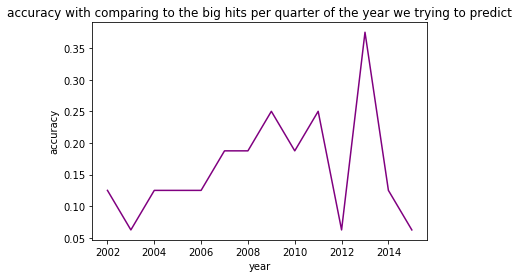

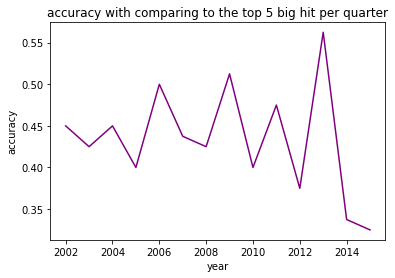

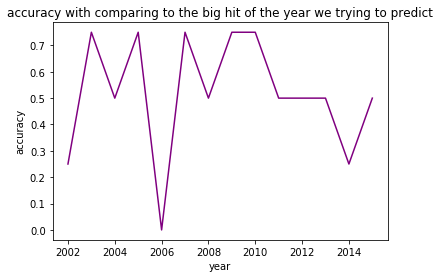

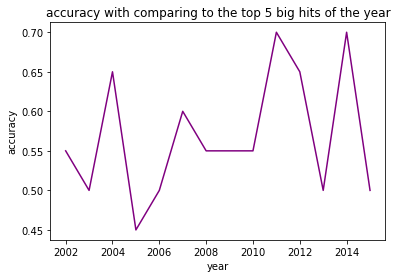

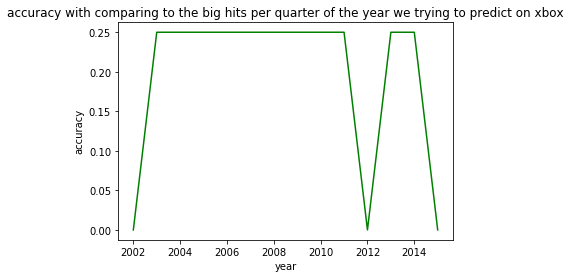

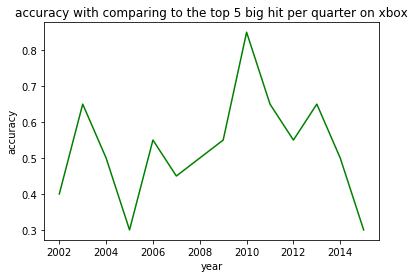

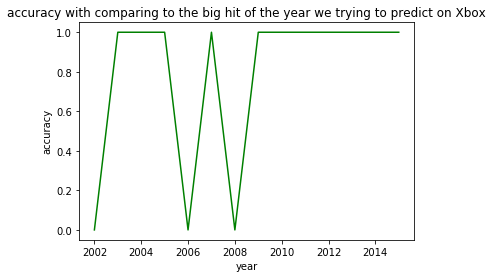

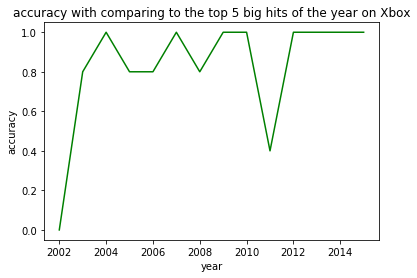

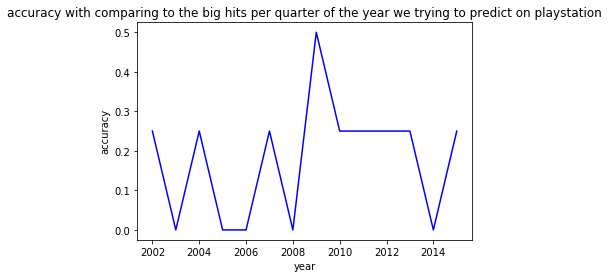

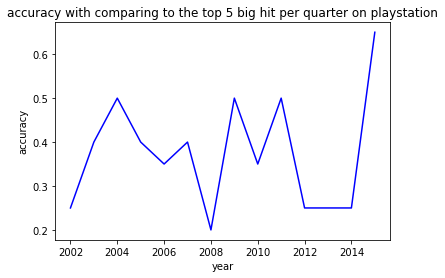

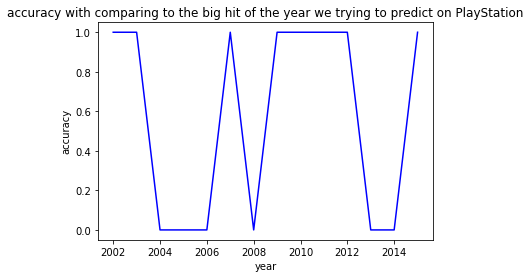

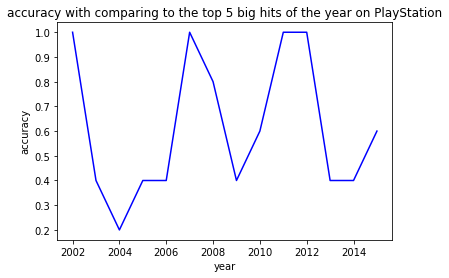

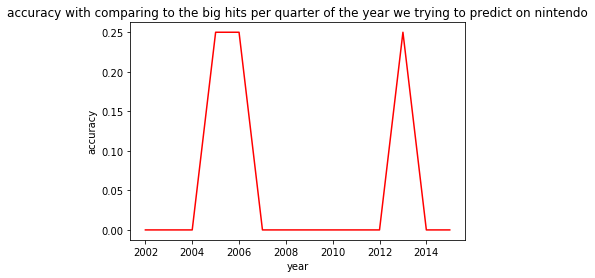

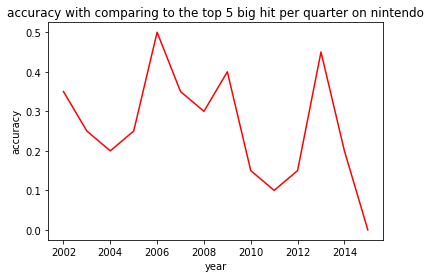

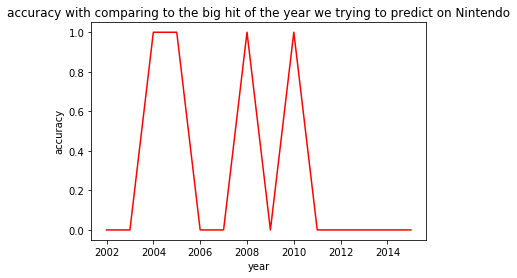

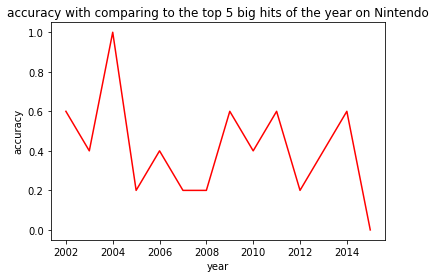

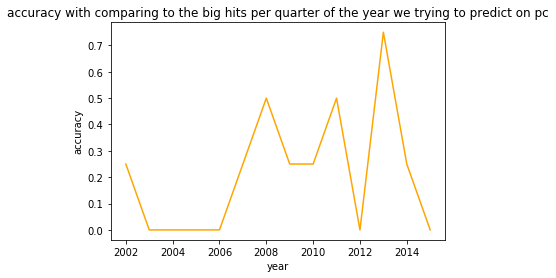

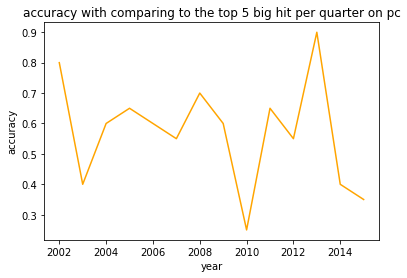

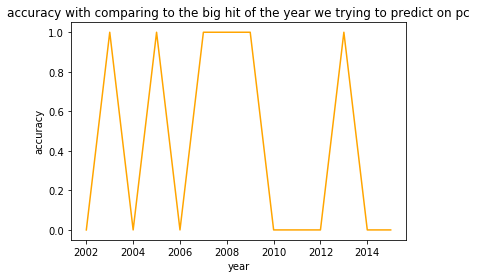

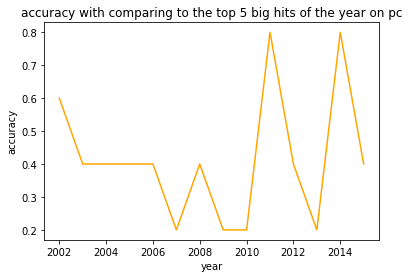

In [34]:
print("Based on all years before the year we trying to predict")
do_accuracy_test_for_four_methods(i-2)



2002 2000 3
2003 2001 4
2004 2002 5
2005 2003 6
2006 2004 7
2007 2005 8
2008 2006 9
2009 2007 10
2010 2008 11
2011 2009 12
2012 2010 13
2013 2011 14
2014 2012 15
2015 2013 16
Based on only two years before the year we trying to predict


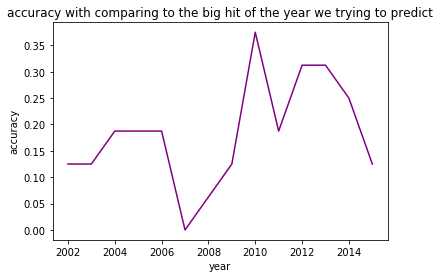

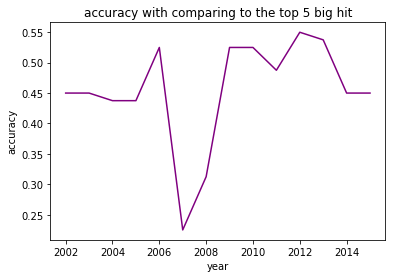

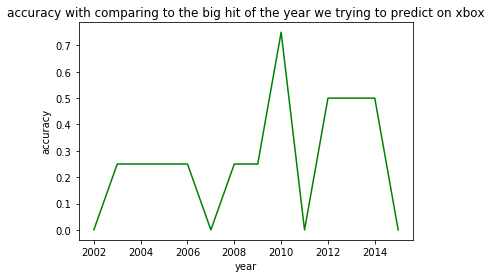

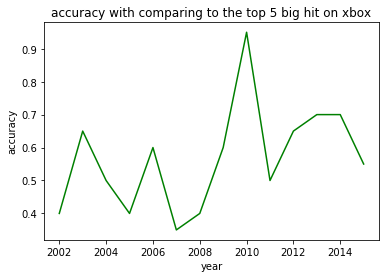

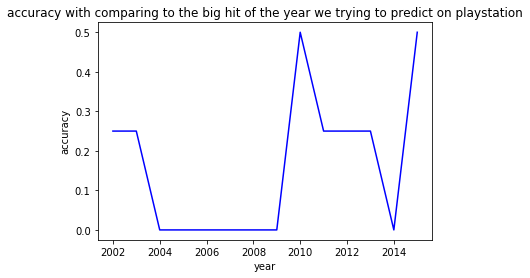

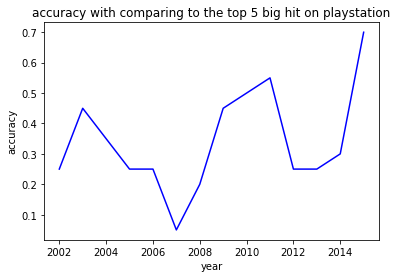

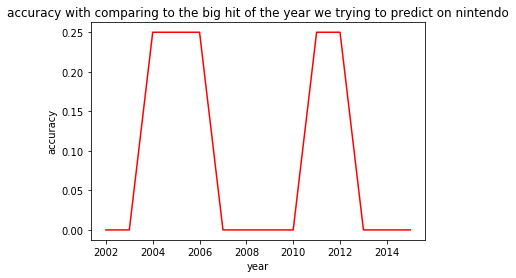

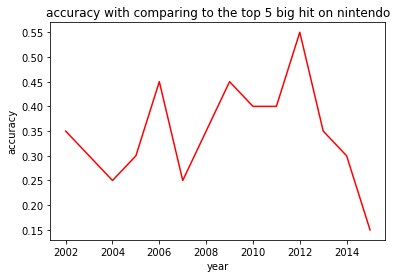

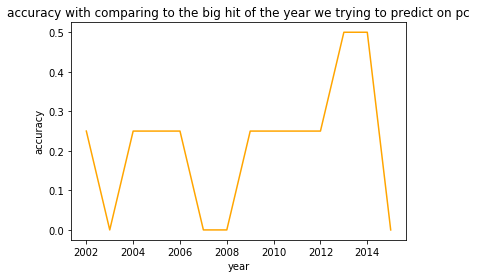

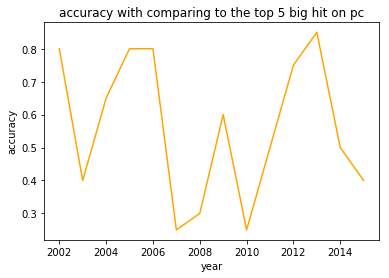

In [25]:
method1all = []
method2all = []

method1xbox = []
method2xbox = []

method1play = []
method2play = []

method1nint = []
method2nint = []

method1pc = []
method2pc = []

for i in range(2, len(years) - 1):
    print(years[i], years[i - 2], i + 1)
    q1, q2, q3, q4 = calc_LinR_model_Cat(get_games_of_year_in_quarters(years[i - 2], years[i], data_xbox))

    q1method1x, q1method2x = get_accuracy(q1, quarter_hits_xbox[0][i + 1])
    q2method1x, q2method2x = get_accuracy(q2, quarter_hits_xbox[1][i + 1])
    q3method1x, q3method2x = get_accuracy(q3, quarter_hits_xbox[2][i + 1])
    q4method1x, q4method2x = get_accuracy(q4, quarter_hits_xbox[3][i + 1])

    q1, q2, q3, q4 = calc_LinR_model_Cat(get_games_of_year_in_quarters(years[i - 2], years[i], data_playstation))

    q1method1ps, q1method2ps = get_accuracy(q1, quarter_hits_playstation[0][i + 1])
    q2method1ps, q2method2ps = get_accuracy(q2, quarter_hits_playstation[1][i + 1])
    q3method1ps, q3method2ps = get_accuracy(q3, quarter_hits_playstation[2][i + 1])
    q4method1ps, q4method2ps = get_accuracy(q4, quarter_hits_playstation[3][i + 1])

    q1, q2, q3, q4 = calc_LinR_model_Cat(get_games_of_year_in_quarters(years[i - 2], years[i], data_nintendo))

    q1method1n, q1method2n = get_accuracy(q1, quarter_hits_nintendo[0][i + 1])
    q2method1n, q2method2n = get_accuracy(q2, quarter_hits_nintendo[1][i + 1])
    q3method1n, q3method2n = get_accuracy(q3, quarter_hits_nintendo[2][i + 1])
    q4method1n, q4method2n = get_accuracy(q4, quarter_hits_nintendo[3][i + 1])

    q1, q2, q3, q4 = calc_LinR_model_Cat(get_games_of_year_in_quarters(years[i - 2], years[i], data_pc))

    q1method1pc, q1method2pc = get_accuracy(q1, quarter_hits_pc[0][i + 1])
    q2method1pc, q2method2pc = get_accuracy(q2, quarter_hits_pc[1][i + 1])
    q3method1pc, q3method2pc = get_accuracy(q3, quarter_hits_pc[2][i + 1])
    q4method1pc, q4method2pc = get_accuracy(q4, quarter_hits_pc[3][i + 1])

    method1all.append((q1method1x + q2method1x + q3method1x + q4method1x +
                   q1method1ps + q2method1ps + q3method1ps + q4method1ps +
                   q1method1n + q2method1n + q3method1n + q4method1n +
                   q1method1pc + q2method1pc + q3method1pc + q4method1pc) / 16)
    method2all.append((q1method2x + q2method2x + q3method2x + q4method2x +
                   q1method2ps + q2method2ps + q3method2ps + q4method2ps +
                   q1method2n + q2method2n + q3method2n + q4method2n +
                   q1method2pc + q2method2pc + q3method2pc + q4method2pc) / 16)

    method1xbox.append((q1method1x + q2method1x + q3method1x + q4method1x) / 4)
    method2xbox.append((q1method2x + q2method2x + q3method2x + q4method2x) / 4)

    method1play.append((q1method1ps + q2method1ps + q3method1ps + q4method1ps) / 4)
    method2play.append((q1method2ps + q2method2ps + q3method2ps + q4method2ps) / 4)

    method1nint.append((q1method1n + q2method1n + q3method1n + q4method1n) / 4)
    method2nint.append((q1method2n + q2method2n + q3method2n + q4method2n) / 4)

    method1pc.append((q1method1pc + q2method1pc + q3method1pc + q4method1pc) / 4)
    method2pc.append((q1method2pc + q2method2pc + q3method2pc + q4method2pc) / 4)

    
print("Based on only two years before the year we trying to predict")    


plt.plot(years[2:-1], method1all, color='purple')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the big hit of the year we trying to predict')
plt.show()

plt.plot(years[2:-1], method2all, color='purple')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the top 5 big hit')
plt.show()


plt.plot(years[2:-1], method1xbox, color="green")
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the big hit of the year we trying to predict on xbox')
plt.show()

plt.plot(years[2:-1], method2xbox, color="green")
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the top 5 big hit on xbox')
plt.show()


plt.plot(years[2:-1], method1play, color='blue')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the big hit of the year we trying to predict on playstation')
plt.show()

plt.plot(years[2:-1], method2play, color='blue')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the top 5 big hit on playstation')
plt.show()


plt.plot(years[2:-1], method1nint, color='red')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the big hit of the year we trying to predict on nintendo')
plt.show()

plt.plot(years[2:-1], method2nint, color='red')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the top 5 big hit on nintendo')
plt.show()


plt.plot(years[2:-1], method1pc, color='orange')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the big hit of the year we trying to predict on pc')
plt.show()

plt.plot(years[2:-1], method2pc, color='orange')
plt.xlabel('year')
plt.ylabel('accuracy')
plt.title('accuracy with comparing to the top 5 big hit on pc')
plt.show()


In [167]:



def split_genres(data):
    new_data = [dict(row) for row in data]
    
    genres = []
    
    for row in new_data:
        if row[our_genre] not in genres:
            genres += [row[our_genre]]
    
    for row in new_data:
        for genre in genres:
            if genre == row[our_genre]:
                row[genre] = 1
            else:
                 row[genre] = 0
        
        del row[our_genre]
    
    return genres, new_data

genres, new_data = split_genres(our_data_Playstation)

NameError: name 'our_data_Playstation' is not defined

In [81]:
print(new_data[0])

{'title': 'LittleBigPlanet PS Vita', 'platform': 'PlayStation Vita', 'score': 9.0, 'release_year': '2012', 'release_month': '9', 'release_day': '12', 'Rank': 1298, 'Publisher': 'Sony Computer Entertainment', 'NA_Sales': 0.4, 'EU_Sales': 0.72, 'JP_Sales': 0.02, 'Other_Sales': 0.33, 'Global_Sales': 1.47, 'Platform': 1, 'Sports': 0, 'Fighting': 0, 'Action': 0, 'Role-Playing': 0, 'Shooter': 0, 'Strategy': 0, 'Racing': 0, 'Simulation': 0, 'Adventure': 0, 'Puzzle': 0, 'Misc': 0}
